# Machine Learning Project

## 데이터 읽어오기 - 데이터 파악

In [1]:
import pandas as pd

housing = pd.read_csv("./data/housing.csv")
print(housing.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [2]:
#데이터의 개략적인 정보 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
#ocean_proximity 특성의 분포 확인
print(housing['ocean_proximity'].value_counts())

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


In [4]:
#숫자 컬럼의 개략 정보 확인
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

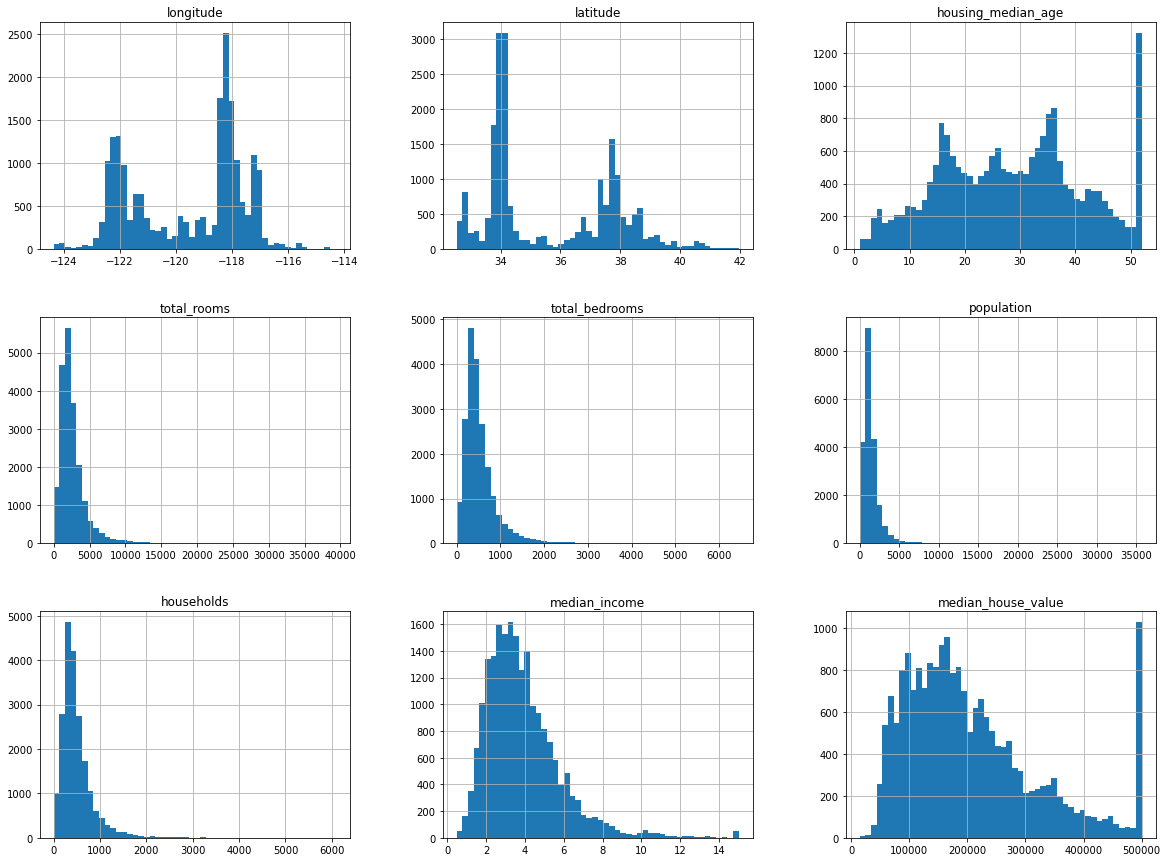

In [5]:
#모든 특성의 히스토그램 출력
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plot", format="png", dpi=300)
plt.show()

## 테스트 데이터 만들기

In [6]:
import numpy as np

#난수 설정 - 항상 동일한 테스트 데이터를 사용하기 위한 목적
np.random.seed(42)

#데이터와 테스트 데이터의 비율을 매개변수로 받아서 테스트 데이터를 리턴해주는 함수
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#8:2의 비율로 데이터를 분할하도록 함수를 호출
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [7]:
from zlib import crc32
# &연산은 파이썬 2 와의 호환성 때문
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [8]:
housing_with_id = housing.reset_index()   # `index` 열이 추가된 데이터프레임을 반환합니다
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [9]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [10]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

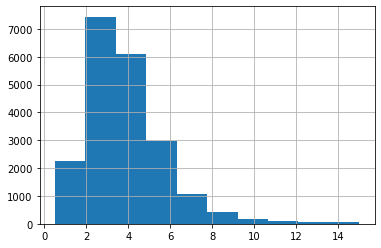

In [12]:
#중간 소득의 히스토그램
housing["median_income"].hist()

In [13]:
#pd.cutO 함수를 사용해 카테고리 5개를 가진 카테고리 특성을 생성
#1에서 5까지 테이블을 가짐
#카태고리 1은 0에서 1.5까지 범위(즉 $15，000 이하)이고 카태고리 2는 1.5에서 3까지 범위가 되는 식입
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

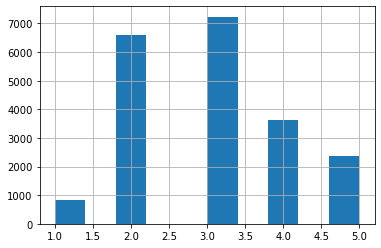

In [14]:
#히스토그램 확인
housing["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
#계층적 분할을 위한 객체 생성
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
#income_cat 특성을 이용해서 계층적 분할
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
#데이터 비율 확인
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [16]:
#전체 데이터에서 계층적 샘플링을 한 경우와 무작위 샘플링을 한 경우의 데이터 비교
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"]
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"]
print(compare_props)

    Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039729  0.040213    100.973236      99.756691
2  0.318847    0.318798  0.324370    101.732260      99.984805
3  0.350581    0.350533  0.358527    102.266446      99.986180
4  0.176308    0.176357  0.167393     94.943666     100.027480
5  0.114438    0.114583  0.109496     95.681626     100.127011


## 데이터 이해를 위한 탐색

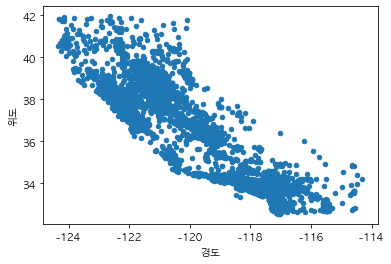

In [17]:
#원본 데이터 보존을 위해서 복제
housing = strat_train_set.copy()
#산포도 출력
import platform
from matplotlib import font_manager, rc
import matplotlib
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
#우분투 리눅스의 경우
else:
    font_name = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    rc('font', family=font_name)
    
#음수 출력
matplotlib.rcParams['axes.unicode_minus'] = False

#위도와 경도를 이용한 산포도
housing = strat_train_set.copy()
ax = housing.plot(kind="scatter", x="longitude", y="latitude")
ax.set(xlabel='경도', ylabel='위도')
plt.savefig("bad_visualization_plot", format="png", dpi=300 )


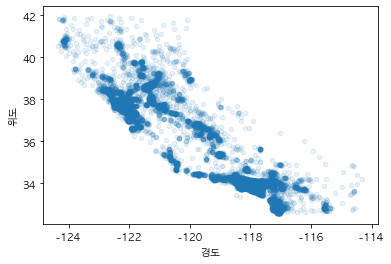

In [19]:
#알파값 조정 : 조금 더 구분이 잘됨
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
ax.set(xlabel='경도', ylabel='위도')
plt.savefig("better_visualization_plot", format="png", dpi=300)

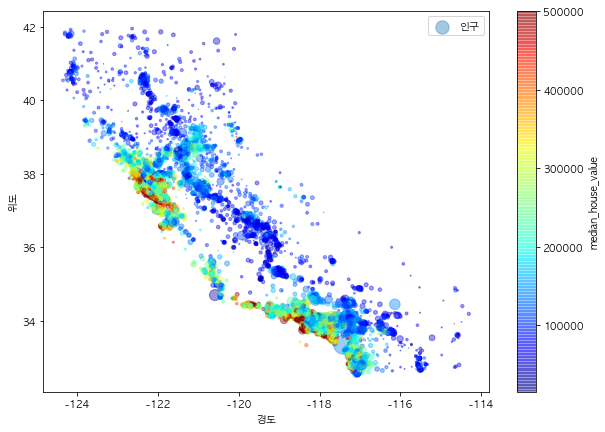

In [20]:
#주택 가격을 색상으로 설정한 시각화
#s - 원의 반지름 - 인구
#c - 색상 - 주택 가격
#cmap - jet - 파란색에서 빨간색으로 갈수록 범위가 커지는 컬러 맵
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='경도', ylabel='위도')
plt.legend()
plt.savefig("housing_prices_scatterplot", format="png", dpi=300)

<ipython-input-22-808e1aa911a4>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)


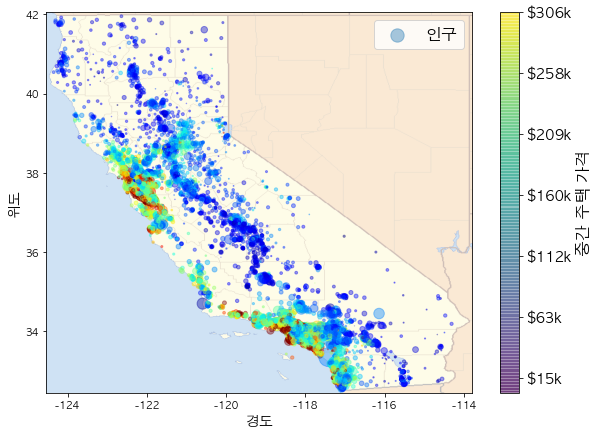

In [22]:
import matplotlib.image as mpimg
california_img=mpimg.imread('./data/images/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="인구",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("위도", fontsize=14)
plt.xlabel("경도", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('중간 주택 가격', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("california_housing_prices_plot", format="png", dpi=300)
plt.show()

In [23]:
#모든 특성의 상관계수 찾기
corr_matrix = housing.corr()
#평균 주택 가격과의 상관계수만 출력
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


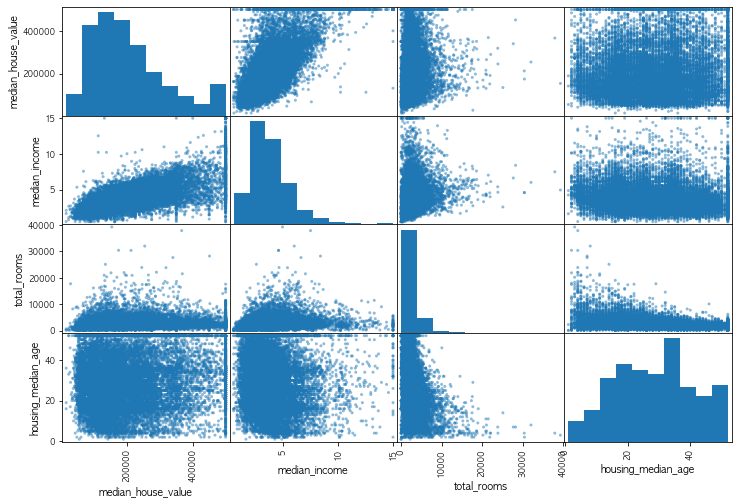

In [24]:
#주택 가격 과의 상관 관계 파악 : 산점도를 이용한 확인
from pandas.plotting import scatter_matrix
#상관관계를 파악할 특성
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.savefig("scatter_matrix_plot", format="png", dpi=300)

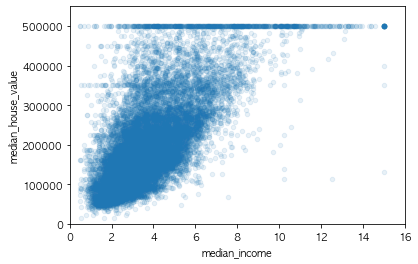

In [25]:
#소득과 주택가격의 산점도
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
plt.savefig("income_vs_house_value_scatterplot", format='png', dpi=300)

In [27]:
#새로운 특성 만들기
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

#상관계수 구하기
corr_matrix = housing.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64


## 데이터 준비

In [45]:
#훈련 데이터 복제 – 레이블을 제외한 데이터 복제
housing = strat_train_set.drop("median_house_value", axis=1) 
#훈련 세트를 위해 레이블 삭제
#레이블에 변형을 적용하지 않기 위해서 레이블값도 복제
housing_labels = strat_train_set["median_house_value"].copy()

## 데이터 전처리

In [46]:
#NaN을 가진 데이터 찾기
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,3


In [47]:
#누락된 구역 제거
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3


In [48]:
#특성 제거
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN,2
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN,4
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN,4
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND,2
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN,3


In [49]:
#중간값으로 대체
#계산한 중간값을 저장
#나중에 시스템을 평가할 때 태스트 세트에 있는 누락된 값과 시스템을 실제 운영될 때 새로운 데이터에 있는 누락된 값을 채워넣는데 필요
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN,3


In [50]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)
# 다른 방법: housing_num = housing.select_dtypes(include=[np.number])

imputer.fit(housing_num)

print(imputer.statistics_)

print(housing_num.median().values)

#훈련 데이터 변환
X = imputer.transform(housing_num)
#변환된 데이터를 DataFrame으로 변환
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index = list(housing.index.values))
#데이터 확인
housing_tr.loc[sample_incomplete_rows.index.values]

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409    3.    ]
[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,2.0
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,4.0
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,4.0
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,2.0
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,3.0


In [51]:
#변환기의 하이퍼파라미터 확인
print(imputer.strategy)

#데이터 확인
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.head()

median


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0


In [60]:
#범주형 특성의 데이터 가져오기
housing_cat = housing['ocean_proximity']
print(housing_cat.head(10))
print()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object



In [61]:
#범주형을 정수 데이터로 변환
housing_cat_encoded, housing_categories = housing_cat.factorize()
print(housing_cat_encoded[:10])
print()

#변환된 데이터의 카테고리 확인
print(housing_categories)

[0 0 1 2 0 2 0 2 0 0]

Index(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'], dtype='object')


In [62]:
from sklearn.preprocessing import OrdinalEncoder
#범주형 특성의 데이터 가져오기
housing_cat = housing[["ocean_proximity"]]

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [63]:
#categories_ 인스턴스 변수를 사용해 카테고리 목록을 얻을 수 있음
#범주형 특성마다 카태고리들의 lD 배열을 담은 리스트를 반환
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [64]:
from sklearn.preprocessing import OneHotEncoder
#원핫인코더 객체 생성
encoder = OneHotEncoder(categories='auto')
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

#희소행렬 출력
print(housing_cat_1hot[:5])

print()
#밀집행렬 출력
print(housing_cat_1hot.toarray()[:5])

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [65]:
cat_encoder = OneHotEncoder(categories='auto', sparse=False)
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)

print(housing_cat_1hot[:5])
print()

print(cat_encoder.categories_)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


### Custom 변환기

In [71]:
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # 열 인덱스 구하기

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self  # 아무것도 하지 않습니다
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [73]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.to_numpy())
print(housing_extra_attribs)

[[-121.89 37.29 38.0 ... 2 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... 5 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 2 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 3 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... 3 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 3 4.843505477308295 1.9859154929577465]]


In [70]:
#housing_extra_attribs는 넘파이 배열이기 때문에 열 이름이 없음
#사이킷 런을 사용할 때 생기는 문제
#DataFrame으로 복원하려면 다음과 같이 할 수 있습니다:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,2,4.625369,2.094395
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,5,6.00885,2.707965
14650,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,2,4.225108,2.025974
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,2,5.232295,4.135977
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,3,4.50581,3.047847


In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#NaN을 중간값으로 변경하고 표준화를 수행
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num_tr)

[[-1.15604281  0.77194962  0.74333089 ... -0.42069842 -0.61493744
  -0.95445595]
 [-1.17602483  0.6596948  -1.1653172  ... -1.02222705  1.33645936
   1.89030518]
 [ 1.18684903 -1.34218285  0.18664186 ... -0.0933178  -0.5320456
  -0.95445595]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.71315642 -0.3167053
  -0.00620224]
 [ 0.78221312 -0.85106801  0.18664186 ... -0.37545069  0.09812139
  -0.00620224]
 [-1.43579109  0.99645926  1.85670895 ...  0.3777909  -0.15779865
  -0.00620224]]


In [75]:
#최신 sklearn 패키지에는 특성 별로 별도의 변환기를 적용하는 ColumnTransformer가 추가
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
#숫자에는 위에서 만든 파이프라인을 범주혀에는 원핫인코딩을 적용하기
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)

[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]


In [76]:
from sklearn.base import BaseEstimator, TransformerMixin

# 사이킷런이 DataFrame을 바로 사용하지 못하므로
# 수치형이나 범주형 컬럼을 선택하는 클래스를 생성
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    num_attribs = list(housing_num)
    
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(categories='auto', sparse=False)),
    ])

full_pipeline = ColumnTransformer([
        ("num_pipeline", num_pipeline, num_attribs),
        ("cat_encoder", OneHotEncoder(categories='auto'), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)
print()

print(housing_prepared.shape)

[[-1.15604281  0.77194962  0.74333089 ...  0.          0.
   0.        ]
 [-1.17602483  0.6596948  -1.1653172  ...  0.          0.
   0.        ]
 [ 1.18684903 -1.34218285  0.18664186 ...  0.          0.
   1.        ]
 ...
 [ 1.58648943 -0.72478134 -1.56295222 ...  0.          0.
   0.        ]
 [ 0.78221312 -0.85106801  0.18664186 ...  0.          0.
   0.        ]
 [-1.43579109  0.99645926  1.85670895 ...  0.          1.
   0.        ]]

(16512, 14)


## 모델 선택 과 훈련

In [77]:
from sklearn.linear_model import LinearRegression

#선형 회귀 적용
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
# 훈련 샘플 몇 개를 사용해 전체 파이프라인을 적용해 보겠습니다.
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))
print("레이블:", list(some_labels))

예측: [205841.96139906 329060.05217695 205219.96047357  61859.01340291
 196908.23636333]
레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [79]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68867.01067610044


In [80]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
print(lin_mae)

50005.71840029504


In [81]:
#DecisionTreeRegressor를 이용한 훈련 및 평가
from sklearn .tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


In [82]:
#k-fold cross validation 검증
#의사 결정 모델
from sklearn .model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error" , cv=10)
tree_rmse_scores = np .sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores) 

Scores: [66511.83866866 65218.24365445 72073.11298807 69065.87982634
 69044.08430761 75497.52594563 67274.5960707  69372.51908292
 70886.10880051 69172.98810858]
Mean: 69411.68974534725
Standard deviation: 2777.9311422791166


In [83]:
#선형 회귀 모델
lin_scores = cross_val_score(lin_reg , housing_prepared , housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np .sqrt(-lin_scores)
display_scores(lin_rmse_scores) 

Scores: [67621.36459192 67050.2893707  68159.77945126 74185.17069359
 68112.25073467 71610.00721757 65235.24278175 68160.85292722
 72191.44396288 68163.77349381]
Mean: 69049.01752253594
Standard deviation: 2581.324004019165


In [84]:
#랜덤 포리스트 모델
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared , housing_labels)
forest_scores = cross_val_score(forest_reg , housing_prepared , housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47817.76484515 45960.02571043 49108.23148429 49909.57256833
 49099.00424513 53430.96871527 48892.45559915 50164.4469287
 51516.28790605 49674.62133279]
Mean: 49557.3379335294
Standard deviation: 1901.828358326763


## 모델 세부 튜닝

In [85]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # 하이퍼파라미터 12(=3×4)개의 조합을 시도
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6(=2×3)개의 조합을 시도
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# 다섯 폴드에서 훈련하면 총 (12+6)*5=90번의 훈련
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', 
                           return_train_score=True, n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [86]:
#탐색 범위의 최대값
print(grid_search.best_params_)
print()

#최적의 추정기에 직접 접근
print(grid_search.best_estimator_)

{'max_features': 8, 'n_estimators': 30}

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)


In [87]:
#평가 점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65366.66703580078 {'max_features': 2, 'n_estimators': 3}
56858.68648818557 {'max_features': 2, 'n_estimators': 10}
53728.51250871097 {'max_features': 2, 'n_estimators': 30}
62502.3123324232 {'max_features': 4, 'n_estimators': 3}
54264.450707578435 {'max_features': 4, 'n_estimators': 10}
52181.399883553015 {'max_features': 4, 'n_estimators': 30}
59858.8772743321 {'max_features': 6, 'n_estimators': 3}
53493.70578220264 {'max_features': 6, 'n_estimators': 10}
51665.391094883606 {'max_features': 6, 'n_estimators': 30}
59233.69330573073 {'max_features': 8, 'n_estimators': 3}
52997.00491751953 {'max_features': 8, 'n_estimators': 10}
51109.833236342696 {'max_features': 8, 'n_estimators': 30}
62734.8537194592 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55244.37690148358 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60824.09594667789 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53772.33825766095 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [88]:
#랜덤 탐색
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                random_state=42, n_jobs=-1)
rnd_search.fit(housing_prepared, housing_labels)

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


50383.3165145688 {'max_features': 7, 'n_estimators': 180}
52786.84834507061 {'max_features': 5, 'n_estimators': 15}
51991.52608636662 {'max_features': 3, 'n_estimators': 72}
52293.40973372167 {'max_features': 5, 'n_estimators': 21}
50450.13139942525 {'max_features': 7, 'n_estimators': 122}
52028.16389639264 {'max_features': 3, 'n_estimators': 75}
51895.311110456896 {'max_features': 3, 'n_estimators': 88}
50983.4708457551 {'max_features': 5, 'n_estimators': 100}
51825.32498511003 {'max_features': 3, 'n_estimators': 150}
67248.17105862842 {'max_features': 5, 'n_estimators': 2}


In [89]:
#중요도 출력
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[1.03898190e-01 9.32286991e-02 5.25573986e-02 2.81968439e-02
 2.99257598e-02 3.83083810e-02 2.73474798e-02 3.75675897e-01
 1.05371924e-01 8.08504981e-03 1.28342675e-01 6.25151743e-05
 2.33658222e-03 6.66260491e-03]


In [90]:
#특성 이름과 함께 출력
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
# cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_encoder = full_pipeline.named_transformers_["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.37567589697285647, 'median_income'),
 (0.1283426754919112, 'pop_per_hhold'),
 (0.1053719236154356, 'income_cat'),
 (0.10389818969870276, 'longitude'),
 (0.09322869908128074, 'latitude'),
 (0.05255739856376141, 'housing_median_age'),
 (0.038308380982398506, 'population'),
 (0.02992575980117524, 'total_bedrooms'),
 (0.02819684389277976, 'total_rooms'),
 (0.02734747978332942, 'households'),
 (0.008085049814709717, 'rooms_per_hhold'),
 (0.006662604906824481, 'INLAND'),
 (0.0023365822205695572, '<1H OCEAN'),
 (6.251517426500354e-05, 'bedrooms_per_room')]

In [91]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value" , axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

48474.605007937585


In [92]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46508.96516972, 50363.5862523 ])